In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
import os

import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2022-09-07 17:48:32.733133: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-07 17:48:32.840907: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-07 17:48:33.419041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-07 17:48:33.419140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [39]:
training_set = os.path.join('./training_set/training_set/')
data_dir = os.path.join(training_set,'cats/')
cats_dir = pathlib.Path(data_dir)

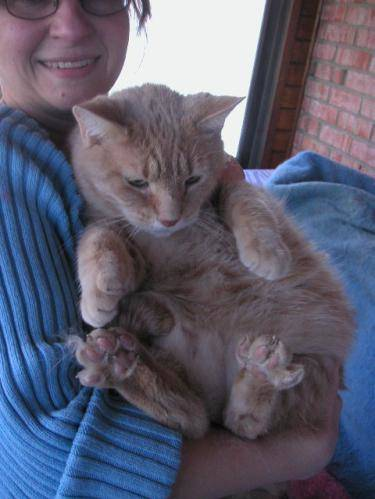

In [40]:
cats = list(cats_dir.glob('cat.*.jpg'))
PIL.Image.open(str(cats[0]))


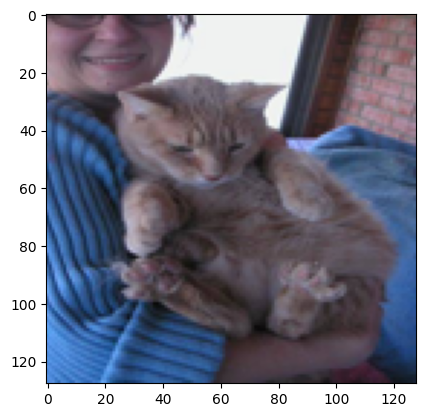

In [41]:
image = PIL.Image.open(str(cats[0]))
image = image.resize((128,128))
plt.imshow(image)

In [42]:
batch_size = 64
img_height = 180
img_width = 180

In [48]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  training_set,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [64]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  training_set,
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 4002 files for validation.


In [51]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [61]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [54]:
normalization_layer = layers.Rescaling(1./255)

In [56]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [65]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
101/101 [==============================] - 60s 598ms/step - loss: 0.0322 - accuracy: 0.9906 - val_loss: 0.6222 - val_accuracy: 0.8828
Epoch 2/5
101/101 [==============================] - 60s 597ms/step - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.7187 - val_accuracy: 0.8873
Epoch 3/5
101/101 [==============================] - 60s 594ms/step - loss: 0.0194 - accuracy: 0.9956 - val_loss: 0.7473 - val_accuracy: 0.8791
Epoch 4/5
101/101 [==============================] - 60s 593ms/step - loss: 0.0473 - accuracy: 0.9836 - val_loss: 0.6747 - val_accuracy: 0.8858
Epoch 5/5
101/101 [==============================] - 59s 582ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.8194 - val_accuracy: 0.8828


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [73]:
img = tf.keras.utils.load_img('/home/azevedo/Documentos/Facul/IA/Atividade1-EDA/training_set/training_set/cats/cat.68.jpg', target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
model.predict(img_array)


ValueError: in user code:

    File "/home/azevedo/Documentos/Facul/IA/Atividade1-EDA/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/home/azevedo/Documentos/Facul/IA/Atividade1-EDA/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/azevedo/Documentos/Facul/IA/Atividade1-EDA/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/home/azevedo/Documentos/Facul/IA/Atividade1-EDA/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/home/azevedo/Documentos/Facul/IA/Atividade1-EDA/.venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/azevedo/Documentos/Facul/IA/Atividade1-EDA/.venv/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 180, 180, 3), found shape=(None, 180, 3)
